In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = pd.read_csv("Gautam Ahuja - austin_final.csv")
  
# the features or the 'x' values of the data
# these columns are used to train the model
# the last column, i.e, precipitation column 
# will serve as the label 
X = data.drop(['PrecipitationSumInches'], axis = 1)
X = X.filter(['TempAvgF', 'DewPointAvgF', 'HumidityAvgPercent',
                  'SeaLevelPressureAvgInches', 'VisibilityAvgMiles',
                  'WindAvgMPH'], axis = 1)
# the output or the label.
Y = data['PrecipitationSumInches']
# reshaping it into a 2-D vector
Y = Y.values.reshape(-1, 1)

In [5]:
X

,TempAvgF,DewPointAvgF,HumidityAvgPercent,SeaLevelPressureAvgInches,VisibilityAvgMiles,WindAvgMPH
0,60,49.0,75.0,29.68,7.0,4.0
1,48,36.0,68.0,30.13,10.0,6.0
2,45,27.0,52.0,30.49,10.0,3.0
3,46,28.0,56.0,30.45,10.0,4.0
4,50,40.0,71.0,30.33,10.0,2.0
...,...,...,...,...,...,...
1314,89,67.0,54.0,29.97,10.0,5.0
1315,91,64.0,54.0,29.90,10.0,5.0
1316,92,64.0,51.0,29.86,10.0,4.0
1317,93,68.0,48.0,29.91,10.0,4.0


In [6]:
day_index = 798 #this will be colored red in next plot
days = [i for i in range(Y.size)]

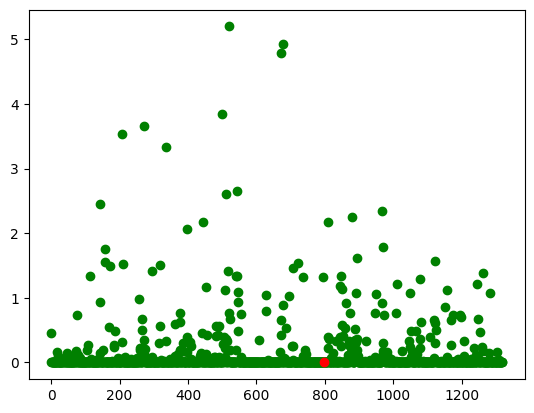

In [7]:
plt.scatter(days, Y, color = 'g')
plt.scatter(days[day_index], Y[day_index], color ='r')

In [8]:
X.corr()

,TempAvgF,DewPointAvgF,HumidityAvgPercent,SeaLevelPressureAvgInches,VisibilityAvgMiles,WindAvgMPH
TempAvgF,1.000000,0.837222,0.022763,-0.138524,0.148463,0.034267
DewPointAvgF,0.837222,1.000000,0.450622,0.101505,0.056602,0.038257
HumidityAvgPercent,0.022763,0.450622,1.000000,0.069634,-0.449230,-0.000472
SeaLevelPressureAvgInches,-0.138524,0.101505,0.069634,1.000000,0.260125,0.046604
VisibilityAvgMiles,0.148463,0.056602,-0.449230,0.260125,1.000000,0.026522
WindAvgMPH,0.034267,0.038257,-0.000472,0.046604,0.026522,1.000000


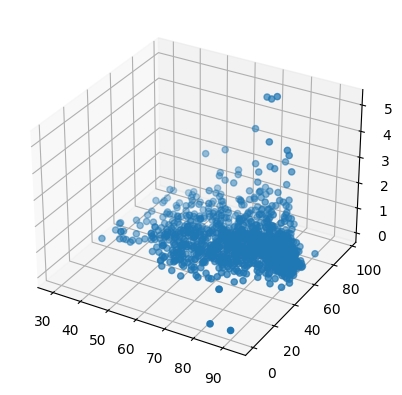

In [9]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[X.columns.values[0]],X[X.columns.values[2]],Y)

In [10]:
def train_val_test_split(X, Y):
    p = np.random.permutation(len(Y))
    tr = np.floor(len(Y)*0.7).astype('int')
    te = np.floor(len(Y)*0.8).astype('int')
    X_train = X[p[:tr],:]
    Y_train = Y[p[:tr]]
    X_val = X[p[tr+1:te],:]
    Y_val = Y[p[tr+1:te]]
    X_test = X[p[te+1:],:]
    Y_test = Y[p[te+1:]]
    return X_train, Y_train, X_val, Y_val, X_test, Y_test 

In [11]:
#X is a pandas data frame, that has to be converted into a numpy array
X_train, Y_train, X_val, Y_val, X_test, Y_test = train_val_test_split(X.to_numpy(),Y)

In [12]:
X_train

array([[89.  , 73.  , 64.  , 29.96, 10.  ,  8.  ],
       [56.  , 41.  , 59.  , 30.04, 10.  ,  3.  ],
       [91.  , 72.  , 63.  , 29.76, 10.  ,  7.  ],
       ...,
       [84.  , 70.  , 69.  , 29.86, 10.  ,  6.  ],
       [52.  , 49.  , 95.  , 29.98,  2.  ,  1.  ],
       [87.  , 73.  , 67.  , 29.97, 10.  ,  7.  ]])

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
LR = LinearRegression()

In [15]:
# use sklearn to fit training data matrix to training output
LR.fit(X_train,Y_train)

LinearRegression()

In [16]:
# These are the thetas that are result of the above fit
print(LR.intercept_,LR.coef_)

[0.30335404] [[-0.00453639  0.00621621  0.00375476  0.00774251 -0.08228115  0.00937189]]


In [17]:
#Use sklearn predict function to predict output for validation data matrix
Yhat_skl_val = LR.predict(X_val)

In [18]:
#This is the Mean Square error -- insample (error in that data used for fitting) and outsample (error in the data not used for fitting)
E_in = np.mean((Y_train-LR.predict(X_train))**2)
E_out = np.mean((Y_val-LR.predict(X_val))**2)
print(E_in,E_out)


0.1624890441046993 0.09410054592847585


In [19]:
#Here we are using the psuedo inverse/analytical method to get an analytical solution for minimizing mean square error
pinv_theta = np.matmul(np.matmul(np.linalg.inv(np.matmul(X_train.transpose(),X_train)),X_train.transpose()),Y_train)

In [20]:
# For the linear regression model this is the predicted output
def predict(X, theta):
    return np.matmul(X,theta)

In [21]:
pinv_theta

array([[-0.00309391],
       [ 0.00475873],
       [ 0.00463613],
       [ 0.0149474 ],
       [-0.08128259],
       [ 0.00934773]])

In [22]:
#predicting output using the pinv_theta from above
Yhat_pinv_val = predict(X_val,pinv_theta)

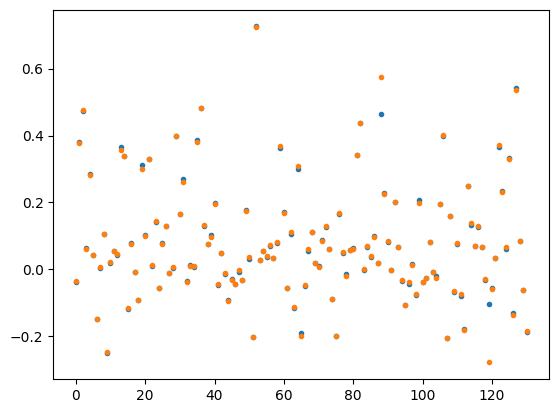

In [23]:
plt.plot(Yhat_skl_val,'.')
plt.plot(Yhat_pinv_val,'.')
#plt.plot(hatY_val,'.')
#plt.plot(hatY_aug_val,'.')

In [24]:
#E_in and E_out for the psuedo inverse method
E_in = np.mean((Y_train-predict(X_train,pinv_theta))**2)
E_out = np.mean((Y_val-Yhat_pinv_val)**2)
print(E_in,E_out)

0.16252833758393484 0.09588121631398405


In [25]:
X_aug_train =  np.c_[X_train,np.ones(len(Y_train))]
X_aug_val =  np.c_[X_val,np.ones(len(Y_val))]

In [26]:
pinv_aug_theta = np.matmul(np.matmul(np.linalg.inv(np.matmul(X_aug_train.transpose(),X_aug_train)),X_aug_train.transpose()),Y_train)

In [27]:
Yhat_pinv_aug_val = predict(X_aug_val,pinv_aug_theta)

In [28]:
pinv_aug_theta

array([[-0.00453639],
       [ 0.00621621],
       [ 0.00375476],
       [ 0.00774251],
       [-0.08228115],
       [ 0.00937189],
       [ 0.30335404]])

[0.88664154] [[-0.00884647  0.01024299 -0.00019107  0.00026806 -0.08243066  0.00406468]]

In [29]:
#E_in and E_out for the psuedo inverse method
E_in = np.mean((Y_train-predict(X_aug_train,pinv_aug_theta))**2)
E_out = np.mean((Y_val-Yhat_pinv_aug_val)**2)
print(E_in,E_out)

0.16248904410469928 0.09410054592847308


### Q1) 
```E_in, E_out reported for Augmented vs Non-Augmented are very similar (down to two decimal points). What is the reason for that? Do you expect that for say data that lies along (y=4x+2) line? (5 pts)```

Answer below using Markdown as a cell or answer in seperate document/sheet.

Non Augmented: E_in = 0.17718319422861312, E_out = 0.04741004889682185

Augmented: E_in = 0.17666641245160644, E_out = 0.04848212971471423

The reason why they are very similar is because the data is augmented with a column with value 1. This augmentation to the data does not change the underlying distribution of the data. The extra column is just the intercept value which shitf the line of best fit vertically. The line of best fit still has the same $\theta_i$ values. The only difference is that the intercept is now a $\theta_{0}$.

If the data was along the line $y=4x+2$, then the augmented data would be $y=4x+2+1$. The line of best fit would still be $y=4x+2$. It is also likely that the E_in and E_out reported for augmented and non-augmented datasets will be very similar. This is because a simple linear function like this can be easily fit by a linear regression model.

### Q2) 
```Does scaling the data matrix such that its mean 0 and variance 1 make a differnce to results? Use 
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
to scale data and then do pinv estimate of theta again, and report Ein, Eout. 
Would you do augmentation before or after Scaling? (5 pts)```

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scale_train = scaler.fit_transform(X_train)
X_scale_val = scaler.transform(X_val)

In [31]:
pinv_scale_theta = np.matmul(np.matmul(np.linalg.inv(np.matmul(X_scale_train.transpose(),X_scale_train)),X_scale_train.transpose()),Y_train)

In [32]:
Yhat_pinv_scale_val = predict(X_scale_val,pinv_scale_theta)

In [33]:
# E_in and E_out for the psuedo inverse method - scaled data
E_in = np.mean((Y_train-predict(X_scale_train,pinv_scale_theta))**2)
E_out = np.mean((Y_val-Yhat_pinv_scale_val)**2)
print(E_in,E_out)

0.17525094433347432 0.11209609071145507


In [34]:
X_scale_aug_train =  np.c_[X_scale_train,np.ones(len(Y_train))]
X_scale_aug_val =  np.c_[X_scale_val,np.ones(len(Y_val))]

In [35]:
pinv_scale_aug_theta = np.matmul(np.matmul(np.linalg.inv(np.matmul(X_scale_aug_train.transpose(),X_scale_aug_train)),X_scale_aug_train.transpose()),Y_train)

In [36]:
Yhat_pinv_scale_aug_val = predict(X_scale_aug_val,pinv_scale_aug_theta)

In [37]:
# E_in and E_out for the psuedo inverse method - scale+augmented data
E_in = np.mean((Y_train-predict(X_scale_aug_train,pinv_scale_aug_theta))**2)
E_out = np.mean((Y_val-Yhat_pinv_scale_aug_val)**2)
print(E_in,E_out)

0.1624890441046993 0.09410054592847587



Non Augmented Scaled Data: E_in = 0.1930326664469512, E_out = 0.04764133024353917

Augmented: E_in = 0.17666641245160647, E_out = 0.04848212971471438

In [38]:
#Initializing theta -- could be all zero or random numbers with mean zero
def init(X,zeros=True):
    n = X.shape[1]
    if zeros:
        theta = np.zeros((n,1))
    else:
        theta = np.random.rand(n,1)-0.5
        theta[-1] = 0
    return theta

In [39]:
theta = init(X_train,zeros=False)

In [40]:
#initial prediction
predict(X_train,theta)

array([[-35.91686202],
       [-24.15346861],
       [-35.42360909],
       [-28.42317135],
       [-21.67287126],
       [-22.38934154],
       [-16.14923009],
       [-30.87556086],
       [-23.54500785],
       [-30.41944245],
       [-33.42547914],
       [-22.78177355],
       [-32.10324598],
       [-32.66394554],
       [-27.98082946],
       [-35.01767955],
       [-31.4388817 ],
       [-28.63880363],
       [-29.10269345],
       [-26.8383038 ],
       [-29.26145138],
       [-30.68870932],
       [-28.89951036],
       [-27.23092805],
       [-23.18061787],
       [-25.24742017],
       [-17.71296377],
       [-24.90772054],
       [-33.54125774],
       [-31.73983677],
       [-35.12966096],
       [-20.77301411],
       [-19.83021121],
       [-24.81374758],
       [-35.51852445],
       [-33.87253163],
       [-32.36282333],
       [-23.15723965],
       [-31.80477514],
       [-35.15680466],
       [-35.29695477],
       [-30.54925863],
       [-31.04811759],
       [-26

In [41]:
#Update for each theta
def update_weights_SGD( X, Y,  theta ) :
        Y_pred = predict(X, theta)  
        # calculate gradients  
        m = X.shape[0]
        dtheta = - ( 2 * ( X.T ).dot( Y - Y_pred )  ) / m          
        return dtheta

In [42]:
update_weights_SGD(X_train,Y_train,theta)

array([[-4309.53531755],
       [-3506.74949098],
       [-3970.0996595 ],
       [-1768.88544914],
       [ -539.80546225],
       [ -291.70016563]])

In [43]:
#iterative SGD each update with the entire training set -- batch gradient descent, page 5 Andrew Ng notes,  
learning_rate = 0.00001
theta = init(X_aug_train)
for _ in range(1000):
    dtheta = update_weights_SGD(X_aug_train,Y_train, theta)
    print(dtheta)
    theta = theta-learning_rate*dtheta 
theta_SGD = theta

[[-15.8991766 ]
 [-14.5992416 ]
 [-18.81033586]
 [ -6.76193109]
 [ -1.53757313]
 [ -1.1987649 ]
 [ -0.22593716]]
[[-10.92567771]
 [-10.55413637]
 [-14.1581913 ]
 [ -4.70555324]
 [ -0.91448917]
 [ -0.85946319]
 [ -0.15734162]]
[[ -7.34694179]
 [ -7.64257344]
 [-10.8070305 ]
 [ -3.22512522]
 [ -0.46608698]
 [ -0.61520011]
 [ -0.10795875]]
[[-4.77227376]
 [-5.54703181]
 [-8.39244031]
 [-2.15931761]
 [-0.14343587]
 [-0.43935435]
 [-0.07240687]]
[[-2.92041685]
 [-4.03893186]
 [-6.65208399]
 [-1.39199125]
 [ 0.08868879]
 [-0.31276153]
 [-0.04681179]]
[[-1.58889764]
 [-2.9537218 ]
 [-5.39710836]
 [-0.83953891]
 [ 0.25564481]
 [-0.22162544]
 [-0.02838452]]
[[-0.63195793]
 [-2.17294278]
 [-4.49156023]
 [-0.44177273]
 [ 0.37568694]
 [-0.15601437]
 [-0.0151173 ]]
[[ 0.0553319 ]
 [-1.61131766]
 [-3.83756845]
 [-0.1553642 ]
 [ 0.46195661]
 [-0.10877857]
 [-0.00556477]]
[[ 5.48509393e-01]
 [-1.20745642e+00]
 [-3.36467672e+00]
 [ 5.08784130e-02]
 [ 5.23914136e-01]
 [-7.47710335e-02]
 [ 1.31357009e-03

In [44]:
theta_SGD

array([[-0.00546737],
       [ 0.00370095],
       [ 0.00718721],
       [-0.00455622],
       [-0.00512787],
       [ 0.00012596],
       [-0.00014541]])

### Bonus Q3) 
```In Andrew Ng notes on page 5 the update rule "batch gradient descent" is given. where updates are done for the entire training set:```
> Repeat Until Convergence {$\theta_j (t+1) = \theta_j(t)+\alpha\sum_{i=1}^m(y_i-h_\theta(x_i))x_{ij}$ }

``` Make sure that the rule coded  in **update_weights()** and  the equation from Ng's notes are consistent. (Andrew Ng uses sum over samples, while code above uses matrix multiplication and then divides by m, Andrew Ng updates are +learning_rate*dtheta, while code is -learning_rate*dtheta).(5 pts)```

In [45]:
def update_weights_BGD(X,Y,alpha,theta):
        m = X.shape[0]
        for i in range (X.shape[1]):
                for j in range(m):
                        Y_pred = predict(X, theta)  
                        # calculate gradients
                        dtheta = - ( 2 * ( X[j,i] ) * ( Y[j] - Y_pred[j] )  ) / m
                        theta[i] = theta[i] - alpha*dtheta
        return theta  

In [46]:
# Entire Batch Gradient descent
alpha = 0.001
theta = init(X_aug_train)
gd_batch_theta = update_weights_BGD(X_aug_train,Y_train,alpha,theta)
gd_batch_theta

array([[ 1.08662098e-03],
       [ 2.75657525e-04],
       [ 2.24081151e-04],
       [-1.19257019e-05],
       [-3.90854473e-04],
       [ 1.67494831e-04],
       [ 1.69978228e-05]])

In [47]:
theta_SGD

array([[-0.00546737],
       [ 0.00370095],
       [ 0.00718721],
       [-0.00455622],
       [-0.00512787],
       [ 0.00012596],
       [-0.00014541]])

In [48]:
sgd_aug_theta = theta_SGD
sgd_aug_theta

array([[-0.00546737],
       [ 0.00370095],
       [ 0.00718721],
       [-0.00455622],
       [-0.00512787],
       [ 0.00012596],
       [-0.00014541]])

In [49]:
Yhat_sgd_aug_val = predict(X_aug_val,sgd_aug_theta)

In [50]:
E_in = np.mean((Y_train-predict(X_aug_train,sgd_aug_theta))**2)
E_out = np.mean((Y_val-Yhat_sgd_aug_val)**2)
print(E_in,E_out)

0.1750442815634692 0.10525451881985061


SDV: E_in = 0.1674905270559173, E_out = 0.17419227704554485

PINV: E_in = 0.15679512381499594, E_out = 0.15966082093403458

PINV_AUG: E_in = 0.1566398643997892, E_out = 0.1587915971518441

SKLEARN: E_in = 0.15663986439978914, E_out = 0.15879159715184443

### Q4) 
```
A. Instead of doing a fixed number of iterations like 1000 above, define a convergence criteria -- it could be for example relative change in dtheta per iteration. (5 pts)
B. The E_in for SGD is much worse than E_in for pinv method or the sklearn method. It can be improved by

    a. Setting better inital learning rate 
    b. Lowering learning rate with iterations

Please experiment with (a) and (b) above to get E_in and E_out for SGD close (very) to E_in and E_out of Pinv method. (15 pts)
```

In [51]:
learning_rate = 0.00001
theta = init(X_aug_train)
prev_dtheta_norm = float('inf')  # initialize to infinity
tolerance = 1e-6  # set tolerance to 1e-6 or some other value

for i in range(1, 1000000000):  # set maximum number of iterations to 1 billion
    dtheta = update_weights_SGD(X_aug_train, Y_train, theta)
    if i == 1:
        prev_dtheta_norm = np.linalg.norm(dtheta)  # compute norm of initial dtheta
    else:
        dtheta_norm = np.linalg.norm(dtheta)
        # abs(dtheta_norm / prev_dtheta_norm - 1) gives the relative change
        if abs(dtheta_norm / prev_dtheta_norm - 1) < tolerance:  # check relative change
            print(f'Convergence reached after {i} iterations')
            break
        prev_dtheta_norm = dtheta_norm  # update previous norm
    theta = theta - learning_rate * dtheta
theta_SGD_new = theta

Convergence reached after 290772 iterations


In [52]:
theta_SGD_new

array([[-0.00309699],
       [ 0.00476142],
       [ 0.00463529],
       [ 0.01492071],
       [-0.08127113],
       [ 0.00934831],
       [ 0.0008143 ]])

PINV_AUG: array([[-0.00536722],
       [ 0.00687938],
       [ 0.00269655],
       [ 0.00590851],
       [-0.0802117 ],
       [ 0.00534617],
       [ 0.45729174]])

In [53]:
sgd_aug_theta_new = theta_SGD_new
Yhat_sgd_aug_val_new = predict(X_aug_val,sgd_aug_theta_new)
E_in = np.mean((Y_train-predict(X_aug_train,sgd_aug_theta_new))**2)
E_out = np.mean((Y_val-Yhat_sgd_aug_val_new)**2)
print(E_in,E_out)

0.16252812728924207 0.09587608426800136


For Learning Rate = 0.00001 and 270395 iterations. The error is closed enough to the pinv method.

PINV: E_in = 0.15679512381499594, E_out = 0.15966082093403458

SGD_NEW: E_in = 0.15679378095087435, E_out = 0.15965316890537856

### Bonus Q5) 
```Instead of using the Batch Gradient Descent method above where the updates are done using the entire training data set, use the Stochastic Gradient Descent method, Andrew Ng page 7 top, where updates are done for each training sample. ```
> Repeat Until convergence { for i =1 to m { $\theta_j (t+1) = \theta_j(t)+\alpha(y_i-h_\theta(x_i))x_{ij}$ }}

```Get similar E_in and E_out as above (5 pts) ```

In [54]:
def update_weights_stochastic_BGD( X, Y, alpha, theta):
        m = X.shape[0]
        # batch gradient descent
        for i in range(m):
                Y_pred = predict(X, theta)  
                # calculate gradients
                for j in range(X.shape[1]):
                        dtheta = - ( 2 * ( X[i,j] ) * ( Y[i] - Y_pred[i] )  ) / m
                        theta[j] = theta[j] - alpha*dtheta
        return theta

In [55]:
alpha = 0.0001
theta = init(X_aug_train)
stochastic_entire_batch_theta = update_weights_stochastic_BGD(X_aug_train,Y_train,alpha,theta)
stochastic_entire_batch_theta

array([[ 3.53471562e-04],
       [ 4.54518656e-04],
       [ 7.21470999e-04],
       [ 1.64537104e-04],
       [-9.69246569e-07],
       [ 3.60285357e-05],
       [ 5.52144091e-06]])

In [56]:
sgd_aug_theta_new_batch = stochastic_entire_batch_theta
Yhat_sgd_aug_val_new_batch = predict(X_aug_val,sgd_aug_theta_new_batch)
E_in = np.mean((Y_train-predict(X_aug_train,sgd_aug_theta_new_batch))**2)
E_out = np.mean((Y_val-Yhat_sgd_aug_val_new_batch)**2)
print(E_in,E_out)

0.19401792418755298 0.11858002488261976


Stochastic Gradient Descent: E_in = 0.18711950753131235, E_out = 0.20574157472842952

### Q6) 

```Rewrite above Stochastic Batch Gradient Descent to work over batches. Let there b batches each of size <=k```
> Repeat Until convergence { for i =1 to b { $\theta_j (t+1) = \theta_j(t)+\alpha\sum_{i=1}^k(y_i-h_\theta(x_i))x_{ij}$ }}

```Note that if say your training sample is for example 910 samples, there will be 9 batches of 100 samples and one batch 10 samples. So there will be 10 batches that will constitute an "epoch". And there will be multiple iterations over the epoch to get good result. (10 pts)```

In [57]:
def update_weights_batch(X, Y, alpha, theta, batch_size):
    # batch gradient descent
    for i in range(0, batch_size):
        Y_pred = predict(X, theta)
        # calculate gradients
        for j in range(X.shape[1]):
            dtheta = - ( 2 * ( X[i,j] ) * ( Y[i] - Y_pred[i] )  ) / batch_size
            theta[j] = theta[j] - alpha*dtheta
    return theta

In [58]:
alpha = 0.0001
theta = init(X_aug_train)
# generate batches of size 100
batch_size = 100
# the last batch may be smaller than 100. If the last batch is smaller than 100, we send the entire batch to the update_weights_batch function
for i in range(0, X_aug_train.shape[0], batch_size):
    if i + batch_size < X_aug_train.shape[0]:
        theta = update_weights_batch(X_aug_train[i:i+batch_size], Y_train[i:i+batch_size], alpha, theta, batch_size)
    else:
        theta = update_weights_batch(X_aug_train[i:], Y_train[i:], alpha, theta, X_aug_train[i:].shape[0])
theta_batch = theta
theta_batch

array([[-1.47174756e-03],
       [ 3.01409337e-04],
       [ 2.27351832e-03],
       [-3.86426240e-04],
       [-5.96550732e-04],
       [ 1.56893968e-05],
       [-1.27291751e-05]])

In [59]:
sgd_aug_theta_batch = theta_batch
Yhat_sgd_aug_val_batch = predict(X_aug_val,sgd_aug_theta_batch)
E_in = np.mean((Y_train-predict(X_aug_train,sgd_aug_theta_batch))**2)
E_out = np.mean((Y_val-Yhat_sgd_aug_val_batch)**2)
print(E_in,E_out)

0.19310819481584557 0.11812441931766597


Batch GD: E_in = 0.18287670678803772, E_out 0.19884138406539875

### Q7) 

``` To get better results one can regularize the cost function. Original cost function is```

$J(\theta) = \sum_{i=0}^m (y_i -theta x_i)^2$

```the regularlized cost function is ```

$J(\theta) = \sum_{i=0}^m (y_i -theta x_i)^2+\lambda ||\theta||_2$

```where $\lambda$ is a regularlization constant (set by you) and``` $||\theta||_2$ ```is the``` $L_2$ ```norm. For this cost function find `dtheta` and then do experiment Q4 B again to report best E_in and E_out results (20 pts)```

In [60]:
def cost_function(X, Y, theta, lambda_reg):
    m = X.shape[0]
    Y_pred = predict(X, theta)
    cost = np.sum((Y_pred - Y)**2) / m + lambda_reg * np.linalg.norm(theta)**2
    return cost

In [61]:
def update_weights_lambda(X, Y, theta, lambda_reg):
    m = X.shape[0]
    # call the cost_function function to calculate the cost which is dtheta
    dtheta = -2*(cost_function(X, Y, theta, lambda_reg))/m
    return dtheta

In [62]:
# the lambda regularization parameter is usually chosed such that it is 1/10th of the maximum eigenvalue of the Hessian matrix. 
# Here the max eigen value of the Hessian matrix is:
def hessian_eigen(x):
    # compute the Hessian matrix of x
    x_grad = np.gradient(x) # first derivatives
    hessian = np.empty(x.shape + (x.ndim, x.ndim), dtype=x.dtype) # empty array for second derivatives
    for k, grad_k in enumerate(x_grad):
        # iterate over dimensions
        tmp_grad = np.gradient(grad_k) # second derivatives
        for l, grad_kl in enumerate(tmp_grad):
            hessian[..., k, l] = grad_kl # assign values to hessian array
    return np.linalg.eigvals(hessian)

In [63]:
eigen_value = hessian_eigen(X_aug_train)
max_eigen_value = np.max(eigen_value)
lambda_reg = max_eigen_value / 10
lambda_reg

7.811130169575878

In [64]:
learning_rate = 0.00001
theta = init(X_aug_train)
prev_dtheta_norm = float('inf')  # initialize to infinity
tolerance = 1e-6  # set tolerance to 1e-6 or some other value
print('Starting gradient descent...')
for i in range(1, 1000000000):  # set maximum number of iterations to 1 billion
    dtheta = update_weights_lambda(X_aug_train, Y_train, theta, lambda_reg)
    if i == 1:
        prev_dtheta_norm = np.linalg.norm(dtheta)  # compute norm of initial dtheta
    else:
        dtheta_norm = np.linalg.norm(dtheta)
        # abs(dtheta_norm / prev_dtheta_norm - 1) gives the relative change
        if abs(dtheta_norm / prev_dtheta_norm - 1) < tolerance:  # check relative change
            print(f'Convergence reached after {i} iterations')
            break
        prev_dtheta_norm = dtheta_norm  # update previous norm
    theta = theta - learning_rate * dtheta
theta_lambda = theta

Starting gradient descent...
Convergence reached after 24619 iterations


In [65]:
theta_lambda

array([[0.00011036],
       [0.00011036],
       [0.00011036],
       [0.00011036],
       [0.00011036],
       [0.00011036],
       [0.00011036]])

In [66]:
sgd_aug_theta_lambda = theta_lambda
Yhat_sgd_aug_val_lambda = predict(X_aug_val,sgd_aug_theta_lambda)
E_in = np.mean((Y_train-predict(X_aug_train,sgd_aug_theta_lambda))**2)
E_out = np.mean((Y_val-Yhat_sgd_aug_val_lambda)**2)
print(E_in,E_out)

0.2041192861352607 0.12672449309235626


SGD_Lambda: E_in = 0.19650232433166434, E_out =  0.21471456324212276